In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"]=(15,5)

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams

In [0]:
data = pd.read_csv("InformeFelicidadMundial.csv")

In [4]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Hapinness State
0,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100,2015,Happy
1,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580,2016,Happy
2,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801,2017,Happy
3,Albania,Central and Eastern Europe,95,4.959,0.878670,0.804340,0.813250,0.35733,0.064130,0.142720,1.898940,2015,Happy
4,Albania,Central and Eastern Europe,109,4.655,0.955300,0.501630,0.730070,0.31866,0.053010,0.168400,1.928160,2016,Happy


In [5]:
# null values
data.isnull()
data.dropna()
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Hapinness State
0,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100,2015,Happy
1,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580,2016,Happy
2,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801,2017,Happy
3,Albania,Central and Eastern Europe,95,4.959,0.878670,0.804340,0.813250,0.35733,0.064130,0.142720,1.898940,2015,Happy
4,Albania,Central and Eastern Europe,109,4.655,0.955300,0.501630,0.730070,0.31866,0.053010,0.168400,1.928160,2016,Happy


In [6]:
# Exploracion de datos 
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
Hapinness State                   object
dtype: object

In [7]:
# Agrupamos para ver el promedio de Rango de Felicidad por Gestion
dat = data.groupby('Year').agg({'Happiness Score' : lambda x: sum(x)/len(x)})
dat.columns =['Rango']
print(dat.head())
print(dat.sum())

         Rango
Year          
2015  5.375734
2016  5.382185
2017  5.354019
Rango    16.111938
dtype: float64


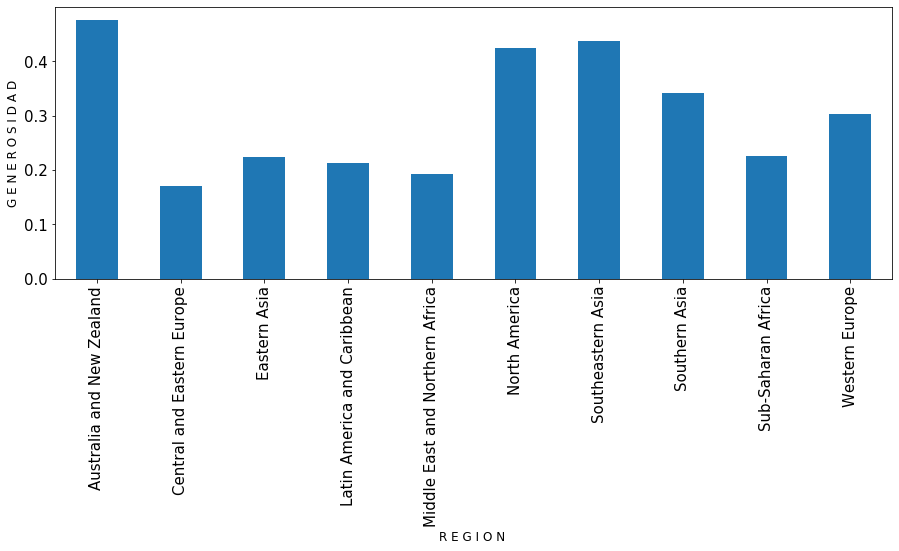

In [8]:
## Visualizamos graficamente la region mas generosa 
data['Year'] = data['Year'].astype(str)
d=data.groupby('Region').mean()["Generosity"].plot(kind='bar', figsize=(15, 5), fontsize=15)
d.set_xlabel("R E G I O N ", fontsize=12)
d.set_ylabel("G E N E R O S I D A D", fontsize=12)
plt.show()

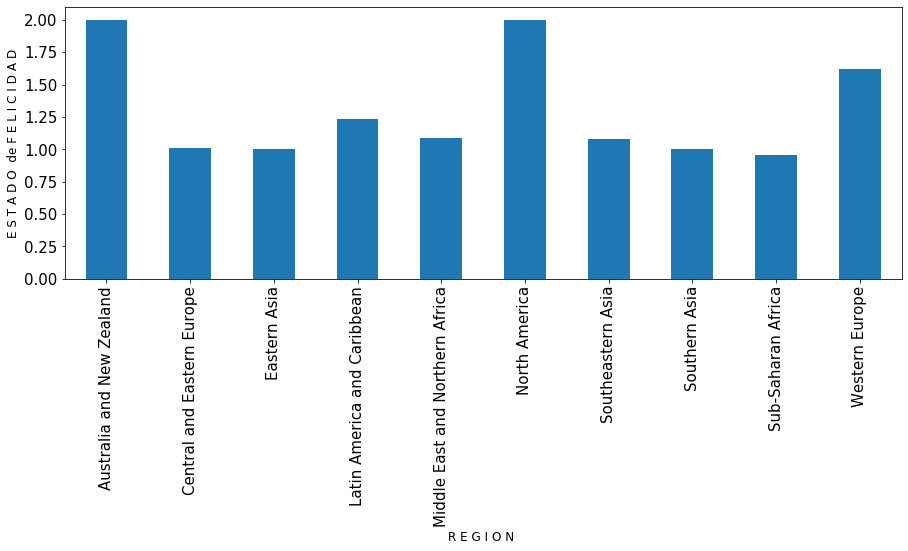

In [9]:
# Visualizamos graficamente el estado de felcidad por region  
data['Hapinness State'].replace(['Unhappy', 'Happy', 'Very Happy'],[0,1,2],inplace=True)
d=data.groupby('Region').mean()["Hapinness State"].plot(kind='bar', figsize=(15, 5), fontsize=15)
d.set_xlabel("R E G I O N ", fontsize=12)
d.set_ylabel("E S T A D O  de F E L I C I D A D", fontsize=12)
plt.show()

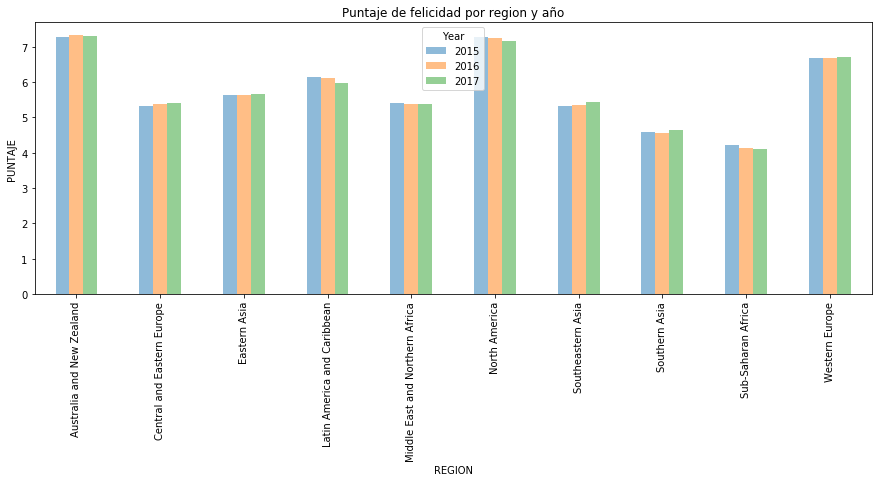

In [10]:
# Visualizamos graficamente el puntaje de felicidad por Gestion y Region  
d = data.pivot_table('Happiness Score', index='Region', columns='Year')
d.plot(title='Puntaje de felicidad por region y año',kind='bar',  alpha=0.5, legend=True)
plt.ylabel('PUNTAJE');
plt.xlabel('REGION');

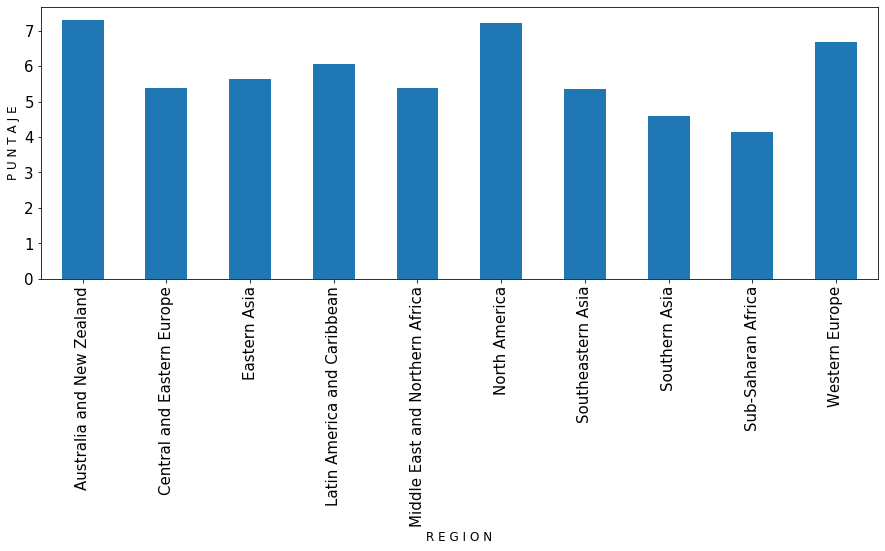

In [11]:
# Visualizamos graficamente el puntaje de felicidad por Gestion
d=data.groupby('Region').mean()["Happiness Score"].plot(kind='bar', figsize=(15, 5), fontsize=15)
d.set_xlabel("R E G I O N", fontsize=12)
d.set_ylabel("P U N T A J E", fontsize=12)
plt.show()